In [10]:
# Cell 1: import required libraries
import os
import zipfile
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Cell 2: download the ZIP file from UCI
!wget https://archive.ics.uci.edu/static/public/53/iris.zip -O iris.zip


--2025-09-14 05:26:50--  https://archive.ics.uci.edu/static/public/53/iris.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘iris.zip’

iris.zip                [ <=>                ]   3.65K  --.-KB/s    in 0s      

2025-09-14 05:26:50 (500 MB/s) - ‘iris.zip’ saved [3738]



In [3]:
# Cell 3: unzip the file
with zipfile.ZipFile('iris.zip', 'r') as zip_ref:
    zip_ref.extractall('iris_data')


In [4]:
# Cell 4: list the contents to see files
!ls iris_data


bezdekIris.data  Index	iris.data  iris.names


In [5]:
# Cell 5: load the data
data_path = 'iris_data/iris.data'

# define column names
cols = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']

df = pd.read_csv(data_path, header=None, names=cols)

# preview
df.head()


,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
# Cell 6: clean class names (optional)
df['species'] = df['class'].str.replace('Iris-', '', regex=False)

df.head()


,sepal_length,sepal_width,petal_length,petal_width,class,species
0,5.1,3.5,1.4,0.2,Iris-setosa,setosa
1,4.9,3.0,1.4,0.2,Iris-setosa,setosa
2,4.7,3.2,1.3,0.2,Iris-setosa,setosa
3,4.6,3.1,1.5,0.2,Iris-setosa,setosa
4,5.0,3.6,1.4,0.2,Iris-setosa,setosa


In [7]:
# Cell 2A
from sklearn.datasets import load_iris
iris = load_iris(as_frame=True)
df = iris.frame.copy()         # numeric features + target
# add readable species name column
df['species'] = df['target'].map(lambda x: iris.target_names[int(x)])
df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [8]:
# Cell 3
# make column names easier to use
df.columns = [c.lower().strip().replace(' ', '_').replace('(', '').replace(')', '').replace('.', '') for c in df.columns]

# if species not present but 'target' is, create species
if 'species' not in df.columns and 'target' in df.columns:
    # try to map using sklearn iris target names if available
    try:
        df['species'] = df['target'].map(lambda x: iris.target_names[int(x)])
    except:
        df['species'] = df['target'].astype(str)

# numeric feature columns (auto-detect sepal/petal)
num_cols = [c for c in df.columns if any(word in c for word in ['sepal','petal']) and pd.api.types.is_numeric_dtype(df[c])]
print("Numeric columns:", num_cols)
print(df.head())
print(df.info())
print(df.describe())
if 'species' in df.columns:
    print(df['species'].value_counts())


Numeric columns: ['sepal_length_cm', 'sepal_width_cm', 'petal_length_cm', 'petal_width_cm']
   sepal_length_cm  sepal_width_cm  petal_length_cm  petal_width_cm  target  \
0              5.1             3.5              1.4             0.2       0   
1              4.9             3.0              1.4             0.2       0   
2              4.7             3.2              1.3             0.2       0   
3              4.6             3.1              1.5             0.2       0   
4              5.0             3.6              1.4             0.2       0   

  species  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   sepal_length_cm  150 non-null    float64
 1   sepal_width_cm   150 non-null    float64
 2   petal_length_cm  150 non-null    float64
 3   petal_width_cm   150 n

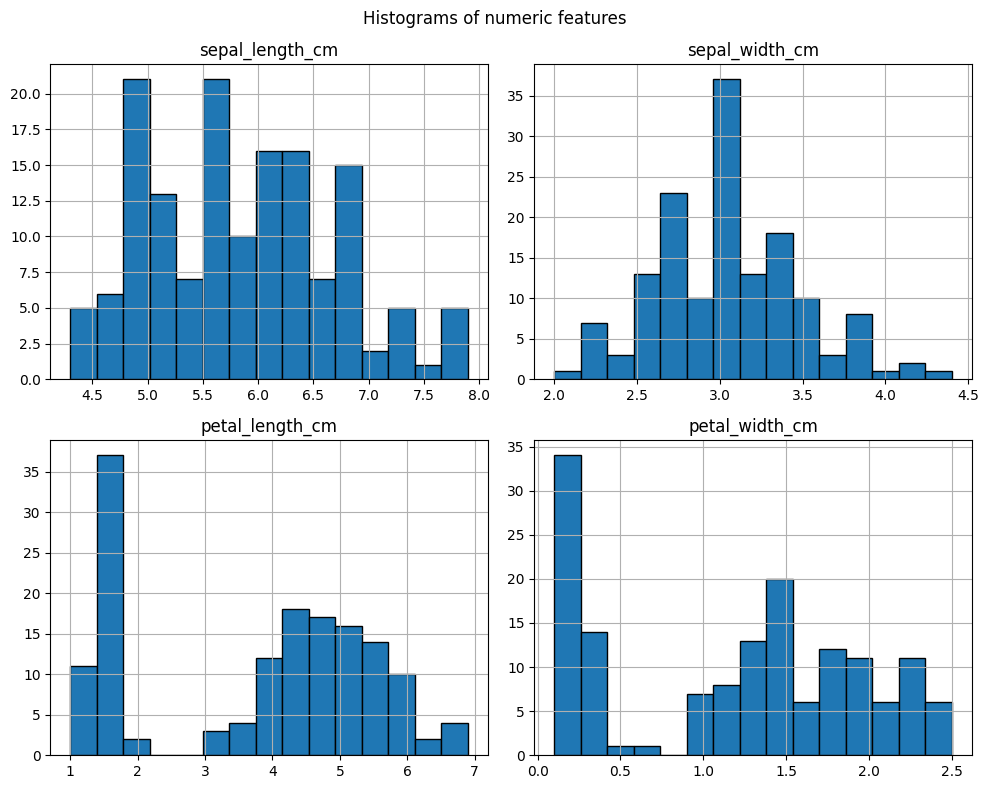

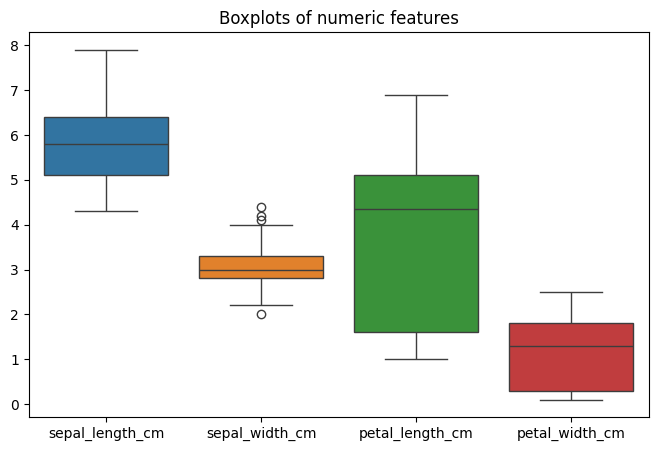

In [11]:
# Cell 4 — Histograms
df[num_cols].hist(figsize=(10,8), bins=15, edgecolor='black')
plt.suptitle('Histograms of numeric features')
plt.tight_layout()
plt.show()

# Cell 5 — Boxplots
plt.figure(figsize=(8,5))
sns.boxplot(data=df[num_cols])
plt.title('Boxplots of numeric features')
plt.show()


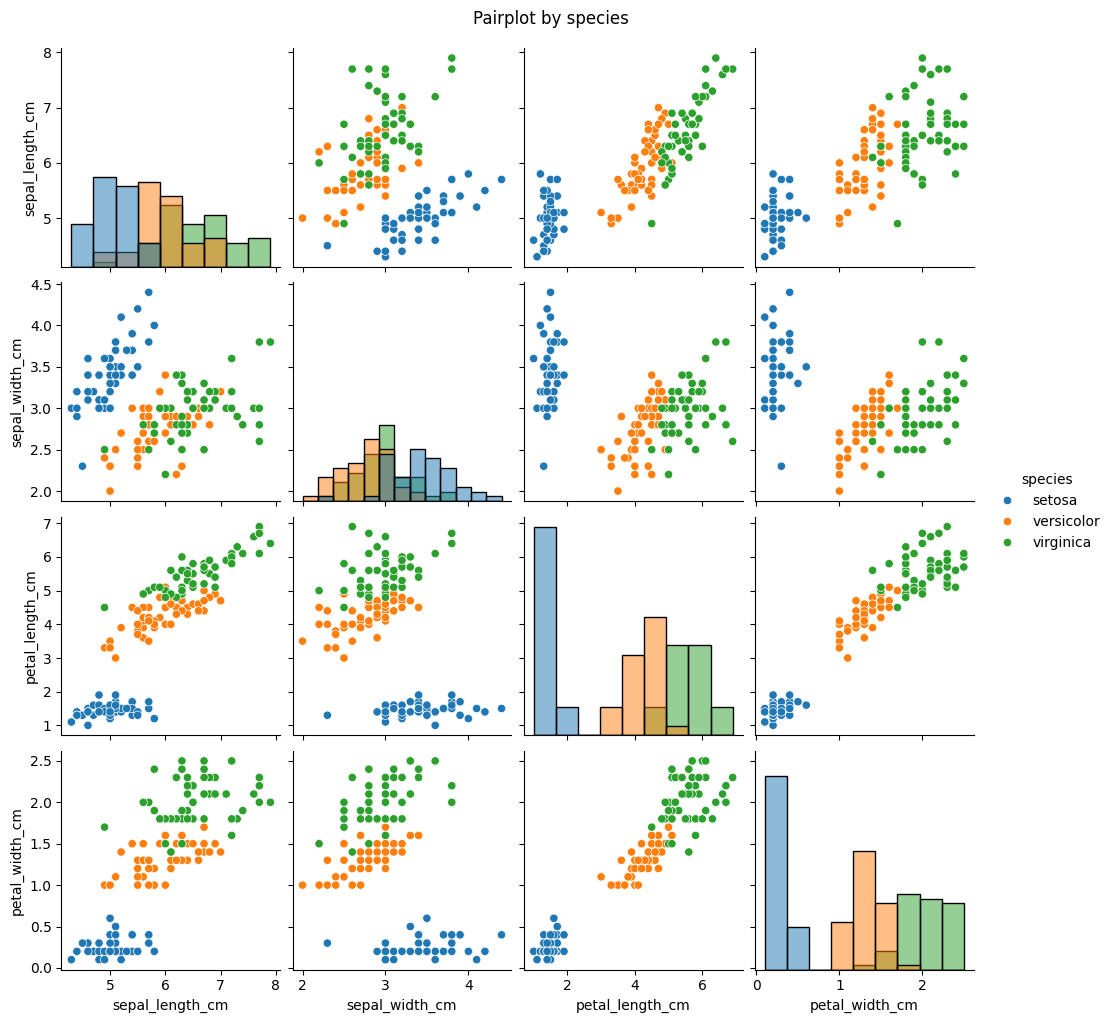

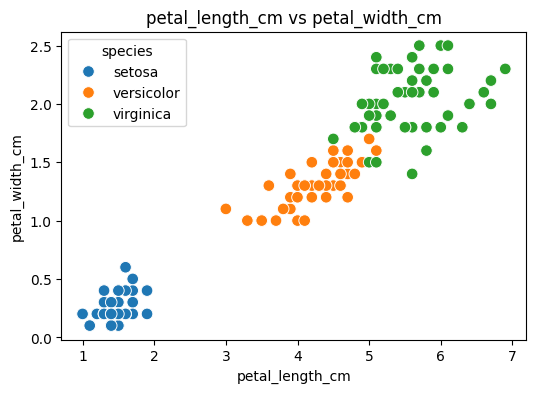

In [12]:
# Cell 6 — Pairplot
sns.pairplot(df, vars=num_cols, hue='species', diag_kind='hist')
plt.suptitle('Pairplot by species', y=1.02)
plt.show()

# Cell 7 — Petal length vs petal width
xcol = next((c for c in num_cols if 'petal_length' in c or 'petal_length' in c), num_cols[2])
ycol = next((c for c in num_cols if 'petal_width' in c or 'petal_width' in c), num_cols[3])
plt.figure(figsize=(6,4))
sns.scatterplot(data=df, x=xcol, y=ycol, hue='species', s=70)
plt.title(f'{xcol} vs {ycol}')
plt.show()


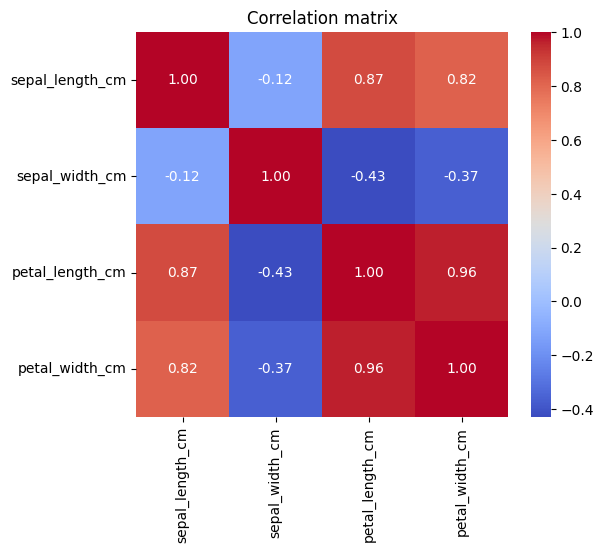

petal_length_cm  petal_width_cm     0.962865
sepal_length_cm  petal_length_cm    0.871754
                 petal_width_cm     0.817941
petal_length_cm  sepal_width_cm     0.428440
sepal_width_cm   petal_width_cm     0.366126
                 sepal_length_cm    0.117570
dtype: float64

In [13]:
# Cell 8
corr = df[num_cols].corr()
plt.figure(figsize=(6,5))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation matrix')
plt.show()

# print top correlations
corr_unstack = corr.abs().unstack().sort_values(ascending=False).drop_duplicates()
corr_unstack = corr_unstack[corr_unstack < 1.0]  # drop self-correlation
corr_unstack.head(10)
